In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## CART implementation

In [3]:
dataset = [[2.771244718,1.784783929,0],
    [1.728571309,1.169761413,0],
    [3.678319846,2.81281357,0],
    [3.961043357,2.61995032,0],
    [2.999208922,2.209014212,0],
    [7.497545867,3.162953546,1],
    [9.00220326,3.339047188,1],
    [7.444542326,0.476683375,1],
    [10.12493903,3.234550982,1],
    [6.642287351,3.319983761,1]]

In [4]:
# input data set is a matrix 
# this function is used for split the dataset into two different group
def gini_gain(groups, class_value):
    gini_gain = 0
    total_size = sum(len(_group) for _group in groups)
    
    for group in groups:
        if len(group)==0:
            continue
        size = len(group)
        score = 0
        group_label = list(row[-1] for row in group)
        
        for _class in class_value:
            prob = group_label.count(_class)/size
            score += prob*prob
        
        gini_gain += (1-score)*(size/total_size)
    
    return gini_gain


def split_node(index, value, dataset):
    """
    dataset: is nested list
    index: represents column index
    value: represent threshold value
    """
    
    left, right = list(),list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    
    return left, right




def find_best_split(dataset):
    
    # initialization
    best_index, best_value, best_score, best_group = 0,0,999,None
    cols = len(dataset[0])-1
    class_label = list(set(i[-1] for i in dataset))
    
    for index in range(cols):
        for row in dataset:
            
            groups = split_node(index,row[index],dataset)
            score = gini_gain(groups, class_label)
            if score < best_score:
                best_score = score
                best_index = index
                best_value = row[index]
                best_group = groups
                
    print('Split X%d < %.3f - score: %.3f' %(best_index,best_value,best_score))
    return {'index': best_index, 'value':best_value,'groups':best_group}

def fit(train, max_depth=1, min_sample=1):
    tree = find_best_split(dataset)
    create_node(tree, max_depth, min_sample, 1)
    return tree

def to_terminal(group):
    # get label
    label = list(row[-1] for row in group)
    # find the class with most element as output
    return max(set(label),key=label.count)

def create_node(node, max_depth, min_sample, depth):
    left, right = node['groups']
    del node['groups']
    # how to stop the recrusion
    if not left or not right:
        # terminate the node
        node['left'] = node['right'] = to_terminal(left+right)
        return
    
    if depth >= max_depth:
        # terminate the node
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
           
    if len(left) <= min_sample:
        node['left'] = to_terminal(left)
    else:
        node['left'] = find_best_split(left)
        create_node(node['left'], max_depth, min_sample, depth+1)
    
    if len(right)<=min_sample:
        node['right'] = to_terminal(right)
        
    else:
        node['right'] = find_best_split(right)
        create_node(node['right'], max_depth, min_sample, depth+1)
    
 

In [29]:
def predict(tree, x):
    
    cart_mdl = tree
    # x is a sample in dataset
    while isinstance(cart_mdl, dict):
        threshold = cart_mdl['value']
        index = cart_mdl['index']
        
        if x[index]<threshold:
            cart_mdl = cart_mdl['left']
        else:
            cart_mdl = cart_mdl['right']
        
    pred_x = cart_mdl
    return pred_x

In [36]:
root = fit(dataset,2,1)

Split X0 < 6.642 - score: 0.000
Split X0 < 2.771 - score: 0.000
Split X0 < 7.498 - score: 0.000


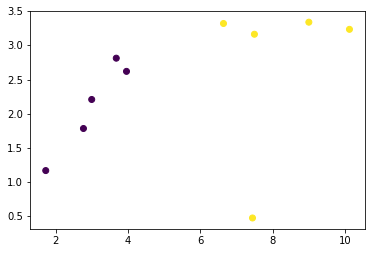

In [6]:
data = np.array(dataset)
x = data[:,0]
y = data[:,1]
c = data[:,2]

plt.scatter(x,y,c=c)

In [35]:

data[5,:]

array([7.49754587, 3.16295355, 1.        ])

In [28]:
root2['left']

0

In [20]:
while isinstance(root2,dict):
    print(root2)
    root2 = root2['left']
    
    
    
    

{'index': 0, 'value': 6.642287351, 'left': {'index': 0, 'value': 2.771244718, 'left': 0, 'right': 0}, 'right': {'index': 0, 'value': 7.497545867, 'left': 1, 'right': 1}}
{'index': 0, 'value': 2.771244718, 'left': 0, 'right': 0}
